In [2]:
#data manipulation and visualization libraries
import os
import time
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
from matplotlib.figure import Figure
import seaborn as sns
import plotly
import plotly.express as px
from warnings import filterwarnings

sns.set()

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20


# 1. Load Data

In [3]:
path = './DataSets/DataSets-main/'

In [4]:
cab = pd.read_csv(path+'Cab_Data.csv')

city = pd.read_csv(path+'City.csv')

customer = pd.read_csv(path+'Customer_ID.csv')

transaction = pd.read_csv(path+'Transaction_ID.csv')

# 2.  Understand Each Data

> # 2.1 Cab

In [5]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


convert time unit

In [6]:
from datetime import datetime, timedelta

In [7]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [8]:
cab['Date of Travel']=cab['Date of Travel'].apply(lambda x:to_date_format(x))

In [9]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [10]:
print(cab.describe())
print(cab.info())

       Transaction ID   KM Travelled  Price Charged   Cost of Trip
count    3.593920e+05  359392.000000  359392.000000  359392.000000
mean     1.022076e+07      22.567254     423.443311     286.190113
std      1.268058e+05      12.233526     274.378911     157.993661
min      1.000001e+07       1.900000      15.600000      19.000000
25%      1.011081e+07      12.000000     206.437500     151.200000
50%      1.022104e+07      22.440000     386.360000     282.480000
75%      1.033094e+07      32.960000     583.660000     413.683200
max      1.044011e+07      48.000000    2048.030000     691.200000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            3

> # 2.2 City

In [11]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


Split city and state

In [12]:
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
c = []

for i in range(len(city)):
    if city.City[i].split()[~0] in US_States:
        c.append(city.City[i].split(f' {city.City[i].split()[~0]}')[0])
        state.append(city.City[i].split()[~0])
    else:
        c.append(city.City[i])
        state.append(np.nan)
        
city['City2'] = c
city['state'] = state
city

,City,Population,Users,City2,state
0,NEW YORK NY,"8,405,837","302,149",NEW YORK,NY
1,CHICAGO IL,"1,955,130","164,468",CHICAGO,IL
2,LOS ANGELES CA,"1,595,037","144,132",LOS ANGELES,CA
3,MIAMI FL,"1,339,155","17,675",MIAMI,FL
4,SILICON VALLEY,"1,177,609","27,247",SILICON VALLEY,NaN
5,ORANGE COUNTY,"1,030,185","12,994",ORANGE COUNTY,NaN
6,SAN DIEGO CA,"959,307","69,995",SAN DIEGO,CA
7,PHOENIX AZ,"943,999","6,133",PHOENIX,AZ
8,DALLAS TX,"942,908","22,157",DALLAS,TX
9,ATLANTA GA,"814,885","24,701",ATLANTA,GA


In [13]:
print(city.describe())
print(city.info())

                City Population     Users    City2 state
count             20         20        20       20    18
unique            20         20        20       20    13
top     SAN DIEGO CA   754,233    27,247   SEATTLE    CA
freq               1          1         1        1     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
 3   City2       20 non-null     object
 4   state       18 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes
None


> # 2.3 Customer

In [14]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [15]:
print(customer.describe())
print(customer.info())

        Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


> # 2.4 Transaction

In [16]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [17]:
print(transaction.describe())
print(transaction.info())
transaction['Transaction ID'].nunique()

       Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB
None


440098

# 3. Join DataFrame

**(1) Merge transaction and customer to get customer info.**

In [18]:
df = pd.merge(transaction, customer, on = 'Customer ID')

In [19]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [20]:
print(df.describe())
print(df.info())

       Transaction ID    Customer ID            Age  Income (USD/Month)
count    4.400980e+05  440098.000000  440098.000000       440098.000000
mean     1.022006e+07   23619.513120      35.360197        15092.181989
std      1.270455e+05   21195.549816      12.582668         7987.309505
min      1.000001e+07       1.000000      18.000000         2000.000000
25%      1.011004e+07    3530.000000      25.000000         8391.000000
50%      1.022006e+07   15168.000000      33.000000        14767.000000
75%      1.033008e+07   43884.000000      42.000000        21084.000000
max      1.044011e+07   60000.000000      65.000000        35000.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Transaction ID      440098 non-null  int64 
 1   Customer ID         440098 non-null  int64 
 2   Payment_Mode        440098 non-null  obje

**(2) merge with cab to get transaction detail**

There are 80706 transaction record not appear in cab, these data will be droped

In [21]:
print(df.shape[0] - cab.shape[0])

80706


In [22]:
df = df.merge(cab, on = 'Transaction ID')

In [23]:
print(df.describe())
print(df.info())

       Transaction ID    Customer ID            Age  Income (USD/Month)  \
count    3.593920e+05  359392.000000  359392.000000       359392.000000   
mean     1.022076e+07   19191.652115      35.336705        15048.822937   
std      1.268058e+05   21012.412463      12.594234         7969.409482   
min      1.000001e+07       1.000000      18.000000         2000.000000   
25%      1.011081e+07    2705.000000      25.000000         8424.000000   
50%      1.022104e+07    7459.000000      33.000000        14685.000000   
75%      1.033094e+07   36078.000000      42.000000        21035.000000   
max      1.044011e+07   60000.000000      65.000000        35000.000000   

        KM Travelled  Price Charged   Cost of Trip  
count  359392.000000  359392.000000  359392.000000  
mean       22.567254     423.443311     286.190113  
std        12.233526     274.378911     157.993661  
min         1.900000      15.600000      19.000000  
25%        12.000000     206.437500     151.200000  
50%   

**(3) merge with city to get city info**

In [24]:
df = pd.merge(df, city, on = 'City')
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,City2,state
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",ATLANTA,GA
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",ATLANTA,GA
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",ATLANTA,GA
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",ATLANTA,GA
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",ATLANTA,GA


In [25]:
print(df.describe())
print(df.info())

       Transaction ID    Customer ID            Age  Income (USD/Month)  \
count    3.593920e+05  359392.000000  359392.000000       359392.000000   
mean     1.022076e+07   19191.652115      35.336705        15048.822937   
std      1.268058e+05   21012.412463      12.594234         7969.409482   
min      1.000001e+07       1.000000      18.000000         2000.000000   
25%      1.011081e+07    2705.000000      25.000000         8424.000000   
50%      1.022104e+07    7459.000000      33.000000        14685.000000   
75%      1.033094e+07   36078.000000      42.000000        21035.000000   
max      1.044011e+07   60000.000000      65.000000        35000.000000   

        KM Travelled  Price Charged   Cost of Trip  
count  359392.000000  359392.000000  359392.000000  
mean       22.567254     423.443311     286.190113  
std        12.233526     274.378911     157.993661  
min         1.900000      15.600000      19.000000  
25%        12.000000     206.437500     151.200000  
50%   

# 4. Prepare the DF

* Remove NA: no NA found.

In [26]:
df.dropna()
df

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,City2,state
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",ATLANTA,GA
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",ATLANTA,GA
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",ATLANTA,GA
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",ATLANTA,GA
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",ATLANTA,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,Female,29,6829,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001",WASHINGTON,DC
359388,10319775,51406,Cash,Female,29,6829,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001",WASHINGTON,DC
359389,10347676,51406,Card,Female,29,6829,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001",WASHINGTON,DC
359390,10358624,51406,Cash,Female,29,6829,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001",WASHINGTON,DC


* transform data type

In [27]:
df['Population'] = df['Population'].apply(lambda x: x.replace(',',''))
df['Users'] = df['Users'].apply(lambda x: x.replace(',',''))

df['Population'].astype(int)
df['Users'].astype(int)

0          24701
1          24701
2          24701
3          24701
4          24701
           ...  
359387    127001
359388    127001
359389    127001
359390    127001
359391    127001
Name: Users, Length: 359392, dtype: int32

# 5. Exploratory Data Analysis

> # 5.1 Profit per ride

In [28]:
df['Profit'] = - df['Cost of Trip'] + df['Price Charged']
df['Year'] = df['Date of Travel'].apply(lambda x: x.year)

In [29]:
df['Company'] = df.Company.astype(str)

Pink = df[df['Company'] == 'Pink Cab'].groupby('Year').Profit.sum().to_frame()
Pink.rename(columns = {'Profit': 'Pink'}, inplace = True)
Pink['Rides1'] = df[df['Company'] == 'Pink Cab'].groupby('Year').Profit.count().to_frame()
Pink['Pink'] = Pink['Pink']/Pink['Rides1']


Yellow = df[df['Company'] == 'Yellow Cab'].groupby('Year').Profit.sum().to_frame()
Yellow.rename(columns = {'Profit': 'Yellow'}, inplace = True)
Yellow['Rides2'] = df[df['Company'] == 'Yellow Cab'].groupby('Year').Profit.count().to_frame()
Yellow['Yellow'] = Yellow['Yellow']/Yellow['Rides2']


Total = Pink.join(Yellow)
Total
#Total['Rides'] = df.groupby(['Company','Year']).Profit.count().to_frame()
#Profit_per_rides = Total['Profit']/Rides['Profit']
#Profit_per_rides
#Total['Profit_per_ride'] = Total['Profit']/Total['Rides']
#Total

,Pink,Rides1,Yellow,Rides2
Year,,,,
2016,68.810861,25285,169.693701,82937
2017,66.714142,30205,168.416894,97759
2018,53.124295,29221,143.450759,93985


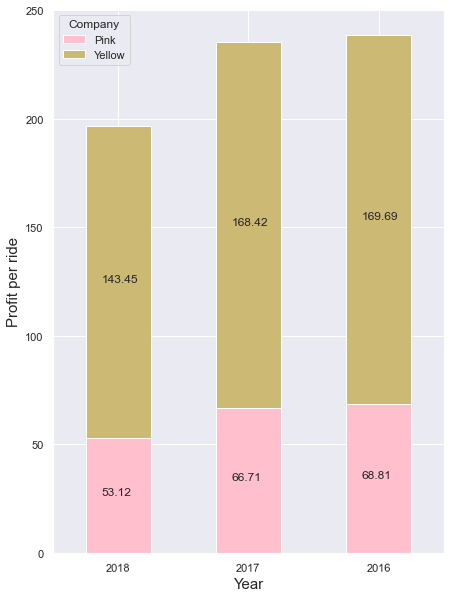

In [30]:
ax = Total.sort_values(['Pink', 'Yellow'])[['Pink', 'Yellow']].plot(kind = 'bar', stacked = True, figsize = (7, 10),
                                                            rot = 1,color = [[1,0.75,0.8],'y']);

ax.get_legend().set_title("Company")
ax.set_ylabel('Profit per ride')
x_offset = -0.13
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1-b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, (b.y1-b.y0) /2+b.y0))

> # 5.2 Profit percent yearwise

In [31]:
Pink = df[df['Company'] == 'Pink Cab'][df['Profit']>0].groupby('Year').Profit.count().to_frame()
Pink['Total'] = df[df['Company'] == 'Pink Cab'].groupby('Year').Profit.count().to_frame()
Pink['Pink'] = Pink['Profit']/Pink['Total']
Pink

<ipython-input-31-23ab53769fb2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Pink = df[df['Company'] == 'Pink Cab'][df['Profit']>0].groupby('Year').Profit.count().to_frame()


,Profit,Total,Pink
Year,,,
2016,22041,25285,0.871703
2017,25840,30205,0.855488
2018,25699,29221,0.879470


In [32]:
Yellow = df[df['Company'] == 'Yellow Cab'][df['Profit']>0].groupby('Year').Profit.count().to_frame()
Yellow['Total'] = df[df['Company'] == 'Yellow Cab'].groupby('Year').Profit.count().to_frame()
Yellow['Yellow'] = Yellow['Profit']/Yellow['Total']
Yellow

<ipython-input-32-10c76a42528f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Yellow = df[df['Company'] == 'Yellow Cab'][df['Profit']>0].groupby('Year').Profit.count().to_frame()


,Profit,Total,Yellow
Year,,,
2016,79044,82937,0.953061
2017,92655,97759,0.947790
2018,89290,93985,0.950045


In [33]:
Pink = Pink.drop(['Total', 'Profit'],axis =1)
Yellow = Yellow.drop(['Total', 'Profit'],axis =1)

Total = Pink.join(Yellow)
Total

,Pink,Yellow
Year,,
2016,0.871703,0.953061
2017,0.855488,0.947790
2018,0.879470,0.950045


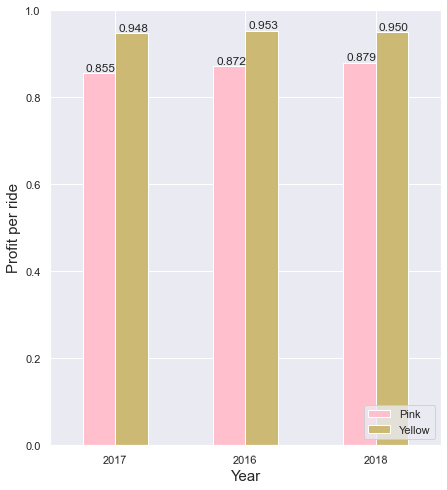

In [34]:
ax = Total.sort_values(['Pink', 'Yellow'])[['Pink', 'Yellow']].plot(kind = 'bar', stacked = False, figsize = (7, 8),
                                                            rot = 1,color = [[1,0.75,0.8],'y']);

ax.get_legend().set_title("Company")
ax.set_ylabel('Profit per ride')
ax.legend(loc = 4)
x_offset = -0.1
y_offset = 0.005
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.3f}".format(b.y1-b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1+y_offset))

> # 5.3 Profit per ride citywise

In [35]:
Pink = df[df['Company'] == 'Pink Cab'][df['Profit']>0].groupby('City2').Profit.count().to_frame()
Pink['Total'] = df[df['Company'] == 'Pink Cab'].groupby('City2').Profit.count().to_frame()
Pink['Pink'] = Pink['Profit']/Pink['Total']
Pink

<ipython-input-35-0fb6a6c95107>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Pink = df[df['Company'] == 'Pink Cab'][df['Profit']>0].groupby('City2').Profit.count().to_frame()


,Profit,Total,Pink
City2,,,
ATLANTA,1485,1762,0.842792
AUSTIN,1719,1868,0.920236
BOSTON,4452,5186,0.858465
CHICAGO,7155,9361,0.764341
DALLAS,839,1380,0.607971
DENVER,926,1394,0.664275
LOS ANGELES,17500,19865,0.880946
MIAMI,1729,2002,0.863636
NASHVILLE,1291,1841,0.701249


In [36]:
Yellow = df[df['Company'] == 'Yellow Cab'][df['Profit']>0].groupby('City2').Profit.count().to_frame()
Yellow['Total'] = df[df['Company'] == 'Yellow Cab'].groupby('City2').Profit.count().to_frame()
Yellow['Yellow'] = Yellow['Profit']/Yellow['Total']
Yellow

<ipython-input-36-42c720d2fa02>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Yellow = df[df['Company'] == 'Yellow Cab'][df['Profit']>0].groupby('City2').Profit.count().to_frame()


,Profit,Total,Yellow
City2,,,
ATLANTA,5709,5795,0.985160
AUSTIN,2937,3028,0.969947
BOSTON,21492,24506,0.877010
CHICAGO,41571,47264,0.879549
DALLAS,5636,5637,0.999823
DENVER,2400,2431,0.987248
LOS ANGELES,27505,28168,0.976463
MIAMI,4387,4452,0.985400
NASHVILLE,1026,1169,0.877673


In [37]:
drop =['Profit', 'Total']
Pink = Pink.drop(drop,axis =1)
Yellow = Yellow.drop(drop, axis =1)

In [38]:
Total = Pink.join(Yellow)
Total

,Pink,Yellow
City2,,
ATLANTA,0.842792,0.985160
AUSTIN,0.920236,0.969947
BOSTON,0.858465,0.877010
CHICAGO,0.764341,0.879549
DALLAS,0.607971,0.999823
DENVER,0.664275,0.987248
LOS ANGELES,0.880946,0.976463
MIAMI,0.863636,0.985400
NASHVILLE,0.701249,0.877673


[Text(0, 0, 'ATLANTA'),
 Text(1, 0, 'AUSTIN'),
 Text(2, 0, 'BOSTON'),
 Text(3, 0, 'CHICAGO'),
 Text(4, 0, 'DALLAS'),
 Text(5, 0, 'DENVER'),
 Text(6, 0, 'LOS ANGELES'),
 Text(7, 0, 'MIAMI'),
 Text(8, 0, 'NASHVILLE'),
 Text(9, 0, 'NEW YORK'),
 Text(10, 0, 'ORANGE COUNTY'),
 Text(11, 0, 'PHOENIX'),
 Text(12, 0, 'PITTSBURGH'),
 Text(13, 0, 'SACRAMENTO'),
 Text(14, 0, 'SAN DIEGO'),
 Text(15, 0, 'SEATTLE'),
 Text(16, 0, 'SILICON VALLEY'),
 Text(17, 0, 'TUCSON'),
 Text(18, 0, 'WASHINGTON')]

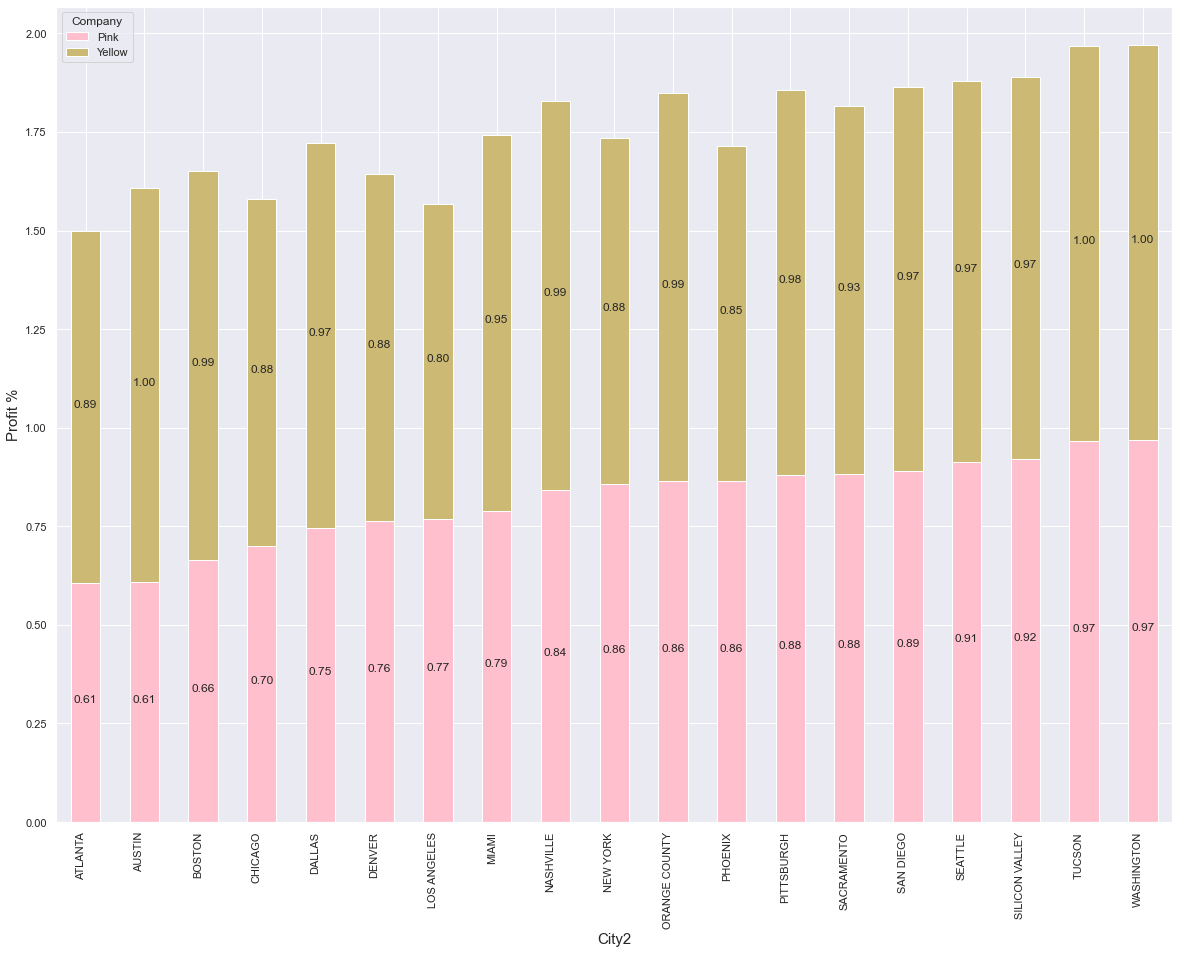

In [39]:
ax = Total.sort_values(['Pink','Yellow'])[['Pink', 'Yellow']].plot(kind = 'bar', stacked = True, figsize = (20, 15),
                                                            rot = 1, color = [[1,0.75,0.8],'y']);

ax.get_legend().set_title("Company")
ax.set_ylabel('Profit %')
x_offset = -0.2
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1-b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, (b.y1-b.y0) /2+b.y0))

ax.set_xticklabels(Total.index, rotation=90, ha='right')

> # 5.4 Yearly Profit

In [40]:
Pink = df[df['Company'] == 'Pink Cab'].groupby('Year').Profit.sum().to_frame()

Pink = Pink.rename(columns = {'Profit': "Pink"})

Pink

,Pink
Year,
2016,1739882.628
2017,2015100.657
2018,1552345.036


In [41]:
Yellow = df[df['Company'] == 'Yellow Cab'].groupby('Year').Profit.sum().to_frame()

Yellow = Yellow.rename(columns = {'Profit': "Yellow"})

Yellow

,Yellow
Year,
2016,1.407389e+07
2017,1.646427e+07
2018,1.348222e+07


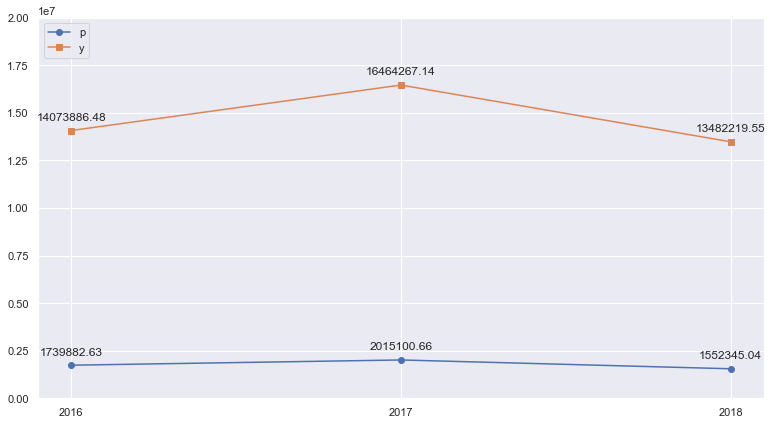

In [42]:
plt.figure(figsize = (13,7))
#sns.lineplot(Pink.index, Pink.Pink, markers=["o"])
#sns.lineplot(Yellow.index, Yellow.Yellow, markers=True)

plt.plot(Pink.index, Pink.Pink, marker = "o")
plt.plot(Yellow.index, Yellow.Yellow, marker = "s")
plt.xticks(Pink.index, labels = ['2016', '2017', '2018'])
plt.ylim([0, 2*10**7])
plt.legend(['p','y'],loc="upper left")

for x,y in zip(Pink.index, Pink.Pink):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
    
for x,y in zip(Yellow.index, Yellow.Yellow):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

> # 5.5 Loyal customer

In [43]:
loyal = df.groupby(["Customer ID", "Company"]).size().reset_index().rename(columns = {0: "count"})
loyal["is_five"] = np.where(loyal['count'] >= 5, "Loyal", "Not Loyal")

loyal

,Customer ID,Company,count,is_five
0,1,Pink Cab,4,Not Loyal
1,1,Yellow Cab,25,Loyal
2,2,Pink Cab,4,Not Loyal
3,2,Yellow Cab,36,Loyal
4,3,Pink Cab,6,Loyal
...,...,...,...,...
72221,59998,Yellow Cab,6,Loyal
72222,59999,Pink Cab,2,Not Loyal
72223,59999,Yellow Cab,6,Loyal
72224,60000,Pink Cab,4,Not Loyal


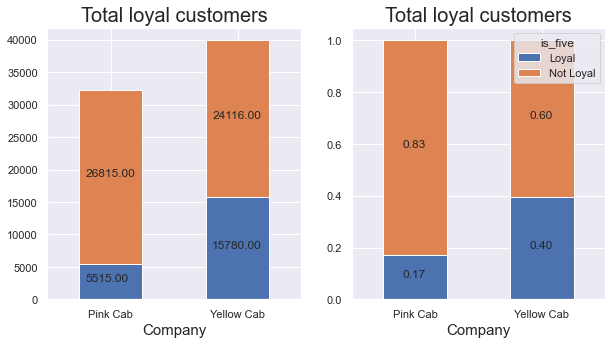

In [44]:
fig, ax2 = plt.subplots(1,2, figsize = (10,5))

ax = pd.crosstab(index = loyal.Company, columns = loyal.is_five).plot(kind = 'bar', rot =0, stacked = True, title = "Total loyal customers", ax = ax2[0], legend = False)

x_offset = -0.2
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1-b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, (b.y1-b.y0) /2+b.y0))

ax = pd.crosstab(index = loyal.Company, columns = loyal.is_five, normalize = 'index').plot(kind = 'bar', rot =0, stacked = True, title = "Total loyal customers", ax = ax2[1])
x_offset = -0.1
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1-b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, (b.y1-b.y0) /2+b.y0))

> # 5.6 Trips Visualization

In [45]:
df['Month'] = df['Date of Travel'].apply(lambda x: x.month)
df['Date'] = df['Date of Travel'].apply(lambda x: x.day)

df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,City2,state,Profit,Year,Month,Date
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,ATLANTA,GA,57.3150,2016,1,7
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,ATLANTA,GA,281.2772,2018,7,20
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,ATLANTA,GA,194.6480,2018,11,22
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,ATLANTA,GA,23.6660,2016,1,5
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,ATLANTA,GA,253.9808,2018,4,20


In [46]:
Dtrips = df.groupby(['Date of Travel', 'Company']).size().reset_index().rename(columns = {0: 'Daily Trips'})
Dtrips

,Date of Travel,Company,Daily Trips
0,2016-01-01,Pink Cab,41
1,2016-01-01,Yellow Cab,140
2,2016-01-02,Pink Cab,52
3,2016-01-02,Yellow Cab,126
4,2016-01-03,Pink Cab,4
...,...,...,...
2185,2018-12-28,Yellow Cab,630
2186,2018-12-29,Pink Cab,56
2187,2018-12-29,Yellow Cab,201
2188,2018-12-30,Pink Cab,58


In [47]:
Dtrips['day'] = Dtrips['Date of Travel'].apply(lambda x: x.day_name())

Dtrips

,Date of Travel,Company,Daily Trips,day
0,2016-01-01,Pink Cab,41,Friday
1,2016-01-01,Yellow Cab,140,Friday
2,2016-01-02,Pink Cab,52,Saturday
3,2016-01-02,Yellow Cab,126,Saturday
4,2016-01-03,Pink Cab,4,Sunday
...,...,...,...,...
2185,2018-12-28,Yellow Cab,630,Friday
2186,2018-12-29,Pink Cab,56,Saturday
2187,2018-12-29,Yellow Cab,201,Saturday
2188,2018-12-30,Pink Cab,58,Sunday


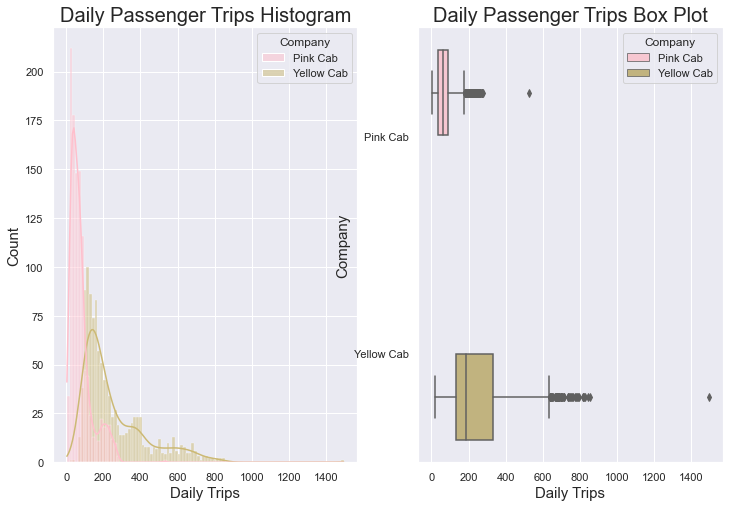

In [48]:
fig, ax = plt.subplots(1,2, figsize = (12,8)) 

sns.histplot(x = 'Daily Trips', hue = 'Company', data = Dtrips, kde = True, palette = [[1,0.75,0.8],'y'], 
             bins = 100, ax = ax[0]).set_title("Daily Passenger Trips Histogram");

sns.boxplot(x = 'Daily Trips', y = 'Company', data = Dtrips, hue = 'Company', palette = [[1,0.75,0.8],'y'], 
            ax = ax[1]).set_title("Daily Passenger Trips Box Plot");

* Yellow Cab has more Daily trips compare to Pink Cab

In [49]:
Dtrips2 = df.groupby(['Year','Month', 'Company']).size().reset_index().rename(columns = {0: 'Monthly Trips'})
Dtrips2['Year_Month'] = Dtrips2['Year'].astype(str) +"-"+ Dtrips2['Month'].astype(str)
Dtrips2

,Year,Month,Company,Monthly Trips,Year_Month
0,2016,1,Pink Cab,940,2016-1
1,2016,1,Yellow Cab,3805,2016-1
2,2016,2,Pink Cab,1054,2016-2
3,2016,2,Yellow Cab,4676,2016-2
4,2016,3,Pink Cab,1244,2016-3
...,...,...,...,...,...
67,2018,10,Yellow Cab,9825,2018-10
68,2018,11,Pink Cab,4018,2018-11
69,2018,11,Yellow Cab,11590,2018-11
70,2018,12,Pink Cab,3572,2018-12


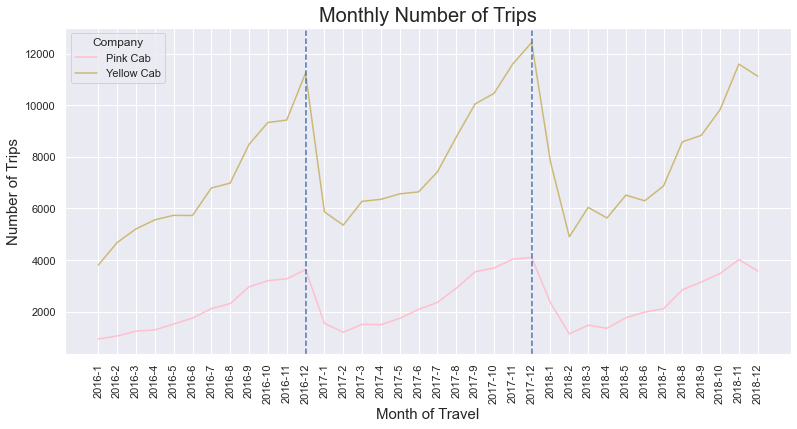

In [50]:

plt.figure(figsize = (13,6))
sns.lineplot(x = 'Year_Month', y = 'Monthly Trips', data = Dtrips2, hue = 'Company', 
             palette = [[1,0.75,0.8],'y']);
plt.title('Monthly Number of Trips');
plt.xlabel('Month of Travel');
plt.ylabel('Number of Trips');

plt.xticks(rotation=90)

plt.axvline(x = 11, color = 'b', label = 'axvline - full height',linestyle = '--')
plt.axvline(x = 23, color = 'b', label = 'axvline - full height',linestyle = '--')

> # 5.7 Loss Analysis 

In [51]:
Loss = df[df['Profit'] < 0]
Loss

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,City2,state,Profit,Year,Month,Date
39,10031719,28533,Card,Male,39,28386,2016-05-12,Pink Cab,ATLANTA GA,4.28,40.49,51.3600,814885,24701,ATLANTA,GA,-10.8700,2016,5,12
42,10347704,29039,Cash,Male,35,17761,2018-07-11,Pink Cab,ATLANTA GA,2.36,24.83,25.0160,814885,24701,ATLANTA,GA,-0.1860,2018,7,11
45,10266097,28102,Cash,Male,39,14181,2017-11-25,Pink Cab,ATLANTA GA,25.52,283.26,293.4800,814885,24701,ATLANTA,GA,-10.2200,2017,11,25
47,10319969,29494,Card,Male,28,5644,2018-04-16,Pink Cab,ATLANTA GA,11.10,108.44,120.9900,814885,24701,ATLANTA,GA,-12.5500,2018,4,16
59,10136342,29599,Card,Male,27,12948,2017-01-09,Pink Cab,ATLANTA GA,5.70,46.79,61.5600,814885,24701,ATLANTA,GA,-14.7700,2017,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359299,10407212,51880,Card,Female,59,22853,2018-11-11,Yellow Cab,WASHINGTON DC,6.90,92.67,92.7360,418859,127001,WASHINGTON,DC,-0.0660,2018,11,11
359310,10218074,52158,Card,Female,59,19249,2017-09-01,Yellow Cab,WASHINGTON DC,5.50,68.35,70.6200,418859,127001,WASHINGTON,DC,-2.2700,2017,9,1
359354,10395329,51257,Cash,Male,39,15247,2018-10-20,Yellow Cab,WASHINGTON DC,38.61,537.94,542.0844,418859,127001,WASHINGTON,DC,-4.1444,2018,10,20
359389,10347676,51406,Card,Female,29,6829,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,418859,127001,WASHINGTON,DC,-5.8540,2018,7,5


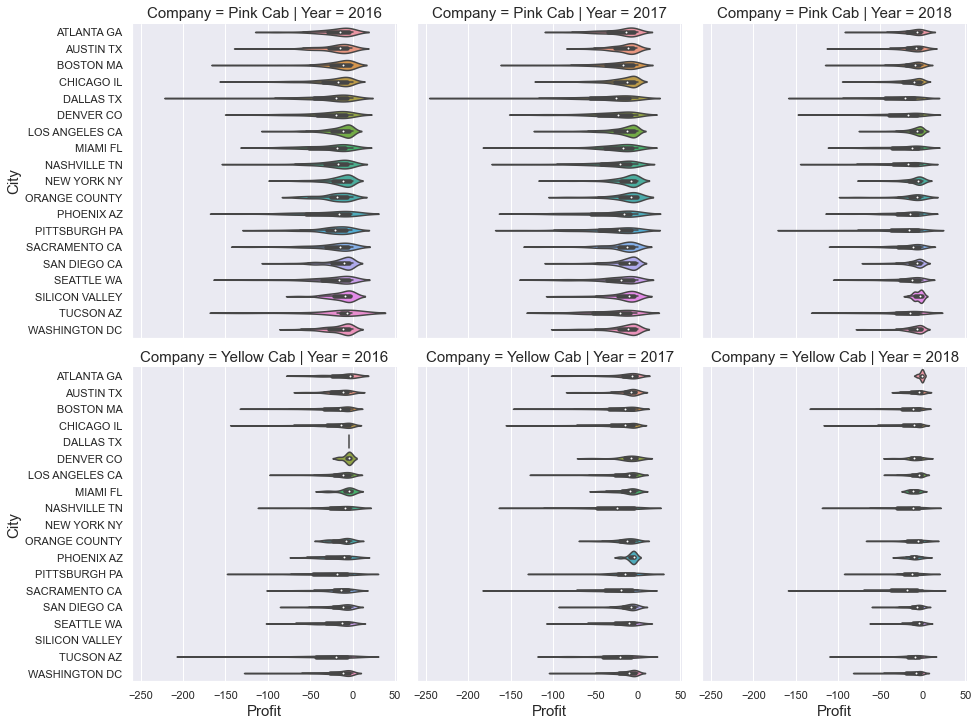

In [52]:
sns.catplot(y = 'City', x = 'Profit', col = 'Year', data = Loss, kind = 'violin',height=5, 
            aspect=0.9, row = 'Company');

> # 5.8 Age group

In [74]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,City2,state,Profit,Year,Month,Date
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,ATLANTA,GA,57.3150,2016,1,7
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,ATLANTA,GA,281.2772,2018,7,20
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,ATLANTA,GA,194.6480,2018,11,22
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,ATLANTA,GA,23.6660,2016,1,5
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,ATLANTA,GA,253.9808,2018,4,20


In [105]:
Age = df.groupby(['Company',pd.cut(df["Age"], np.arange(18, 69, 10))]).size().reset_index().rename(columns = {0:"Num"})
#Age.groupby('Company').Num.sum()
#Age.plot(kind = 'bar', x = 'Age', y = 'Num', stack = True, )
Pink = Age[Age['Company'] == 'Pink Cab']
Yellow = Age[Age['Company'] == 'Yellow Cab']

Pink = Pink.rename(columns = {'Num': 'Pink'})
Pink = Pink.drop(['Company'] ,axis = 1)
Yellow = Yellow.rename(columns = {'Num': 'Yellow'})
Yellow = Yellow.drop(['Company'] ,axis = 1)

Total = pd.merge(Pink, Yellow, on = 'Age')
Total = Total.set_index('Age')

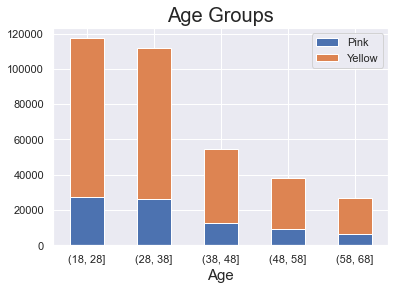

In [108]:
# fig, ax2 = plt.subplots(1,1, figsize = (10,5))

ax = Total.plot(kind = 'bar', rot =0, stacked = True, title = "Age Groups")

# x_offset = -0.2
# y_offset = 0.02
# for p in ax.patches:
#     b = p.get_bbox()
#     val = "{:.2f}".format(b.y1-b.y0)        
#     ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, (b.y1-b.y0) /2+b.y0))
#ax = sns.barplot(x="Age", y="Num", data=Age, hue = 'Company')

> # 5.9 Customer Income Distribution 

In [112]:
df.head()
#df.describe()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,City2,state,Profit,Year,Month,Date
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,ATLANTA,GA,57.3150,2016,1,7
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,ATLANTA,GA,281.2772,2018,7,20
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,ATLANTA,GA,194.6480,2018,11,22
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,ATLANTA,GA,23.6660,2016,1,5
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,ATLANTA,GA,253.9808,2018,4,20


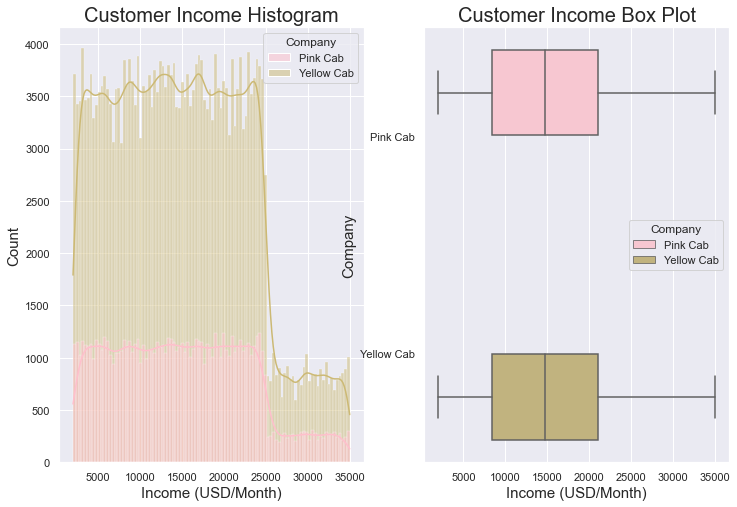

In [118]:
fig, ax = plt.subplots(1,2, figsize = (12,8)) 

sns.histplot(x = 'Income (USD/Month)', hue = 'Company', data = df, kde = True, palette = [[1,0.75,0.8],'y'], 
             bins = 100, ax = ax[0]).set_title("Customer Income Histogram");

sns.boxplot(x = 'Income (USD/Month)', y = 'Company', data = df, hue = 'Company', palette = [[1,0.75,0.8],'y'], 
            ax = ax[1]).set_title("Customer Income Box Plot");